<a href="https://colab.research.google.com/github/Ahantikau/-_German-Traffic-Sign/blob/main/German_Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Zip File
from google.colab import files
uploaded = files.upload()

Saving germantrafficsigns.zip to germantrafficsigns.zip


In [ ]:
!unzip -q "germantrafficsigns.zip"

In [ ]:
# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
!ls
!ls germantrafficsigns*

germantrafficsigns.zip	LICENSE.txt  sample_data  train  validation
germantrafficsigns.zip


In [ ]:
!ls train
!ls validation

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039
00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


In [ ]:
import os
import cv2  # For reading images, or use PIL
import numpy as np

In [ ]:
def load_images_and_labels(folder_path, img_size=(32,32)):
    X = []
    y = []
    for label in sorted(os.listdir(folder_path)):
        class_folder = os.path.join(folder_path, label)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(int(label))
    return np.array(X), np.array(y)


In [ ]:
X_train, y_train = load_images_and_labels('train', img_size=(32,32))
X_valid, y_valid = load_images_and_labels('validation', img_size=(32,32))

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(31367, 32, 32, 3) (31367,)
(7842, 32, 32, 3) (7842,)


In [ ]:
if os.path.exists('test'):
    X_test, y_test = load_images_and_labels('test')

In [ ]:
import numpy as np

def get_n_samples_per_class(X, y, n=10):
    X_samples = []
    y_samples = []
    for label in np.unique(y):
        idx = np.where(y == label)[0]  # Indices for current class
        selected = np.random.choice(idx, n, replace=False) if len(idx) >= n else idx
        for i in selected:
            X_samples.append(X[i])
            y_samples.append(label)
    return np.array(X_samples), np.array(y_samples)

X_sample, y_sample = get_n_samples_per_class(X_train, y_train, n=10)

print(X_sample.shape, y_sample.shape)

(430, 32, 32, 3) (430,)


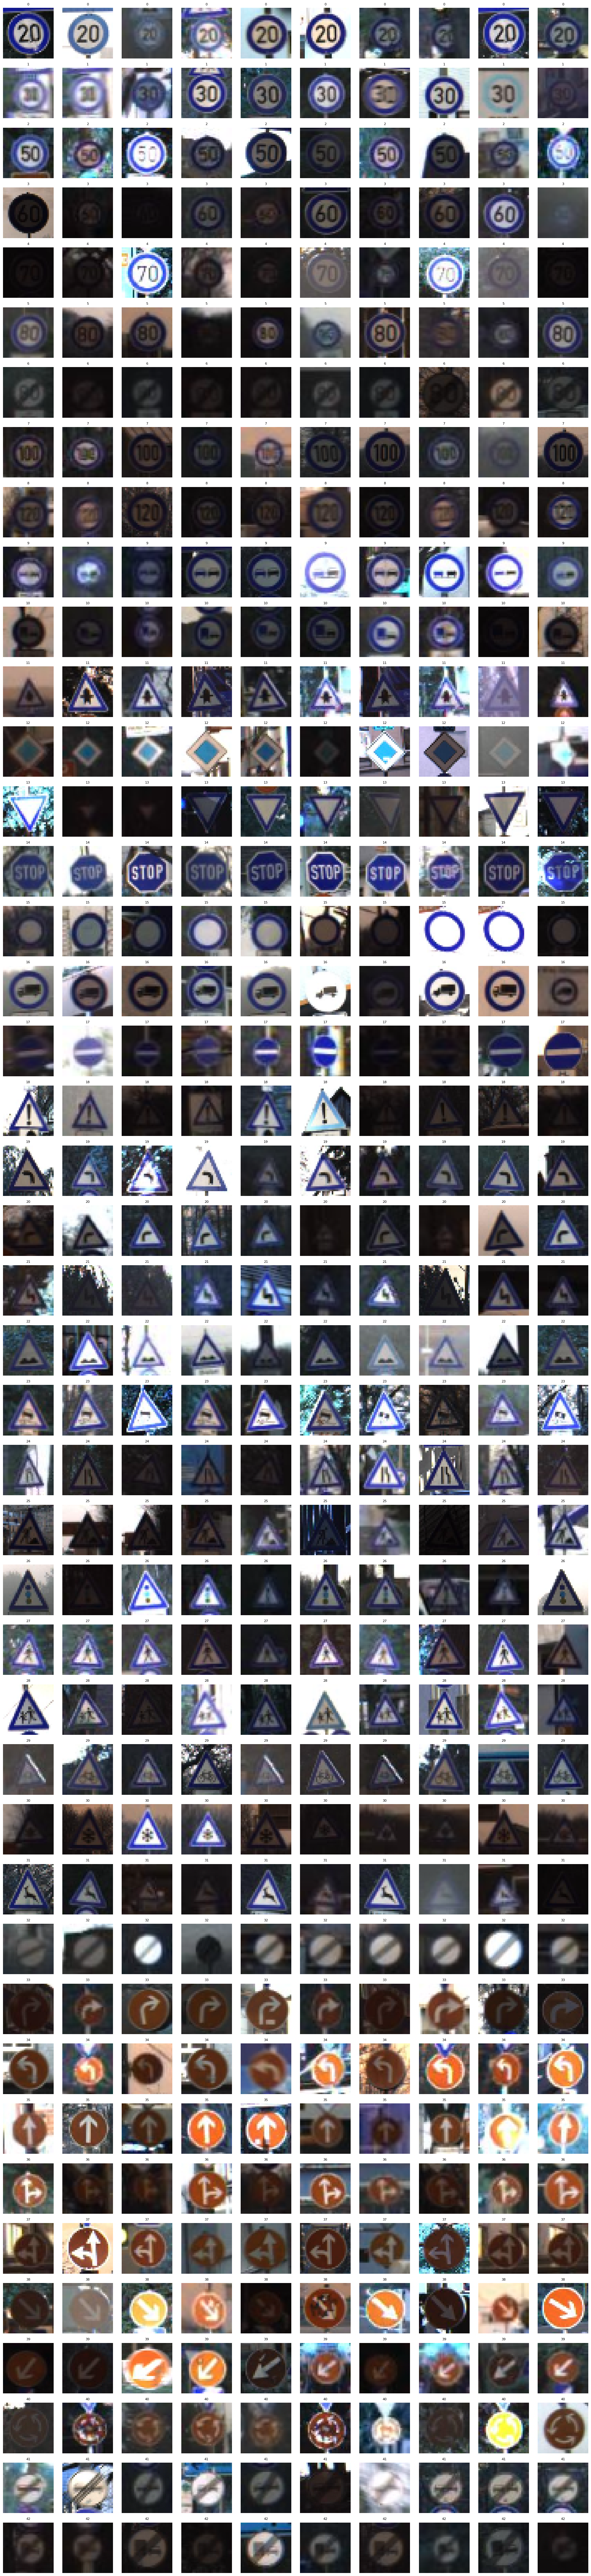

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images_grid(X, y, n=10):
    unique_labels = np.unique(y)
    num_classes = len(unique_labels)
    fig, axes = plt.subplots(num_classes, n, figsize=(n*2, num_classes*2))

    for i, label in enumerate(unique_labels):
        idxs = np.where(y == label)[0][:n]
        for j, idx in enumerate(idxs):
            axes[i, j].imshow(X[idx])
            axes[i, j].set_title(f'{label}', fontsize=8)
            axes[i, j].axis('off')
        # Agar kisi class mein kam image ho toh baki subplot blank kar do
        for j in range(len(idxs), n):
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

show_images_grid(X_sample, y_sample, n=10)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to training data (if required)
datagen.fit(X_train)

# Use generator for model training or to get augmented batches
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
    # Use augmented batch for training or visualization
    break


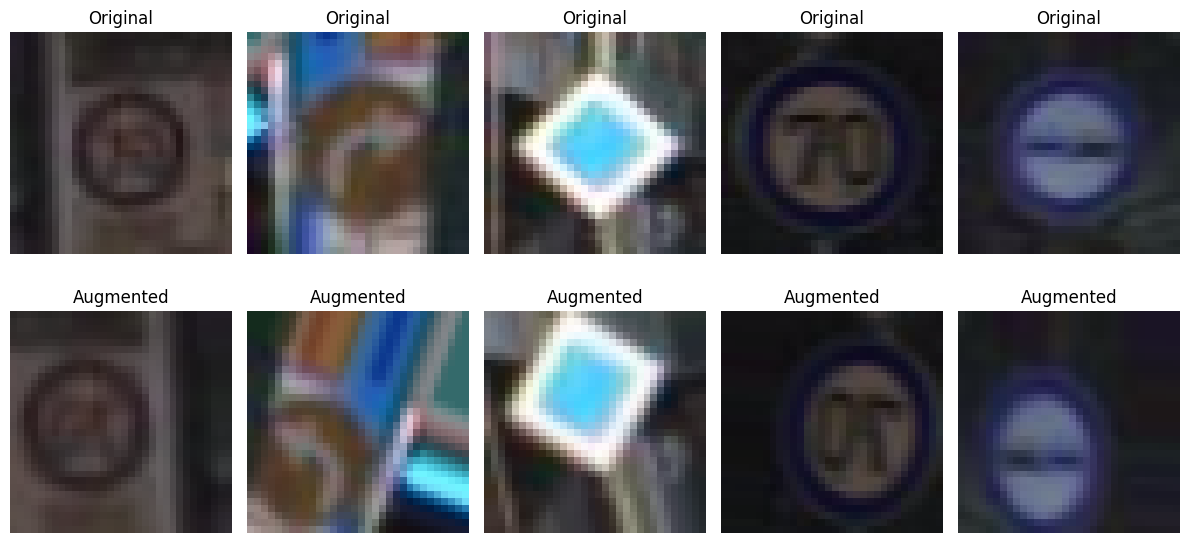

In [ ]:
import matplotlib.pyplot as plt

# Create ImageDataGenerator for augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Select 5 random images from original X_train for visualization
sample_indices = np.random.choice(len(X_train), 5, replace=False)
original_images = X_train[sample_indices]

# Prepare iterator for augmented images
aug_iter = datagen.flow(original_images, batch_size=5, shuffle=False)

# Get augmented images batch (first batch)
augmented_images = next(aug_iter)

# Plot side by side original and augmented images
plt.figure(figsize=(12, 6))
for i in range(5):
    # Original
    plt.subplot(2, 5, i+1)
    plt.imshow(original_images[i].astype('uint8'))
    plt.title("Original")
    plt.axis('off')

    # Augmented
    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_images[i].astype('uint8'))
    plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0

# Labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_valid_cat = to_categorical(y_valid, num_classes)

In [ ]:
# Model code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_valid, y_valid_cat),
    epochs=10, batch_size=32
)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9898 - val_loss: 0.0436
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9888 - val_loss: 0.0462
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9894 - val_loss: 0.0410
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9878 - loss: 0.0368 - val_accuracy: 0.9912 - val_loss: 0.0365
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9876 - loss: 0.0363 - val_accuracy: 0.9915 - val_loss: 0.0390
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9893 - val_loss: 0.0519
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 0.9895 - val_loss: 0.0472
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9884 - loss: 0.0384 - 

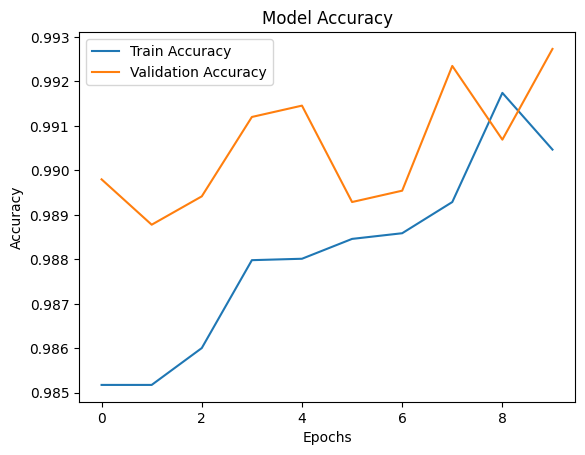

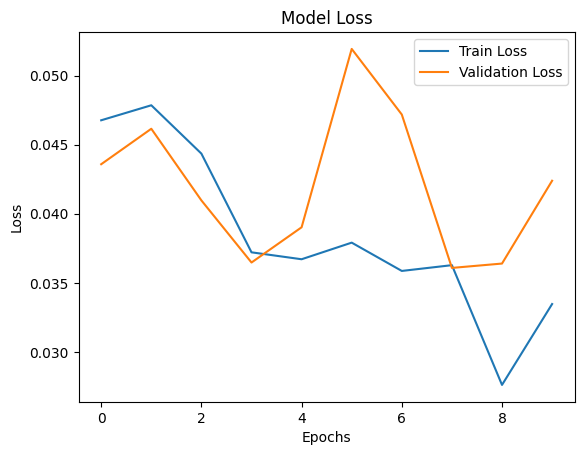

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


Training Accuracy: 0.9904676675796509
Validation Accuracy: 0.9927314519882202


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict on validation set
y_pred_prob = model.predict(X_valid)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_valid_cat, axis=1)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f'Validation Accuracy: {acc:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
cr = classification_report(y_true, y_pred)
print('Classification Report:')
print(cr)


246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Validation Accuracy: 0.9927
Confusion Matrix:
[[ 39   3   0 ...   0   0   0]
 [  0 441   1 ...   0   0   0]
 [  0   0 450 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   0  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.99      0.99      0.99       444
           2       0.98      1.00      0.99       450
           3       0.99      0.99      0.99       282
           4       0.99      1.00      0.99       396
           5       0.99      0.97      0.98       372
           6       1.00      1.00      1.00        84
           7       0.99      0.98      0.99       288
           8       0.99      0.98      0.99       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       1.00      0.99      1.00     

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


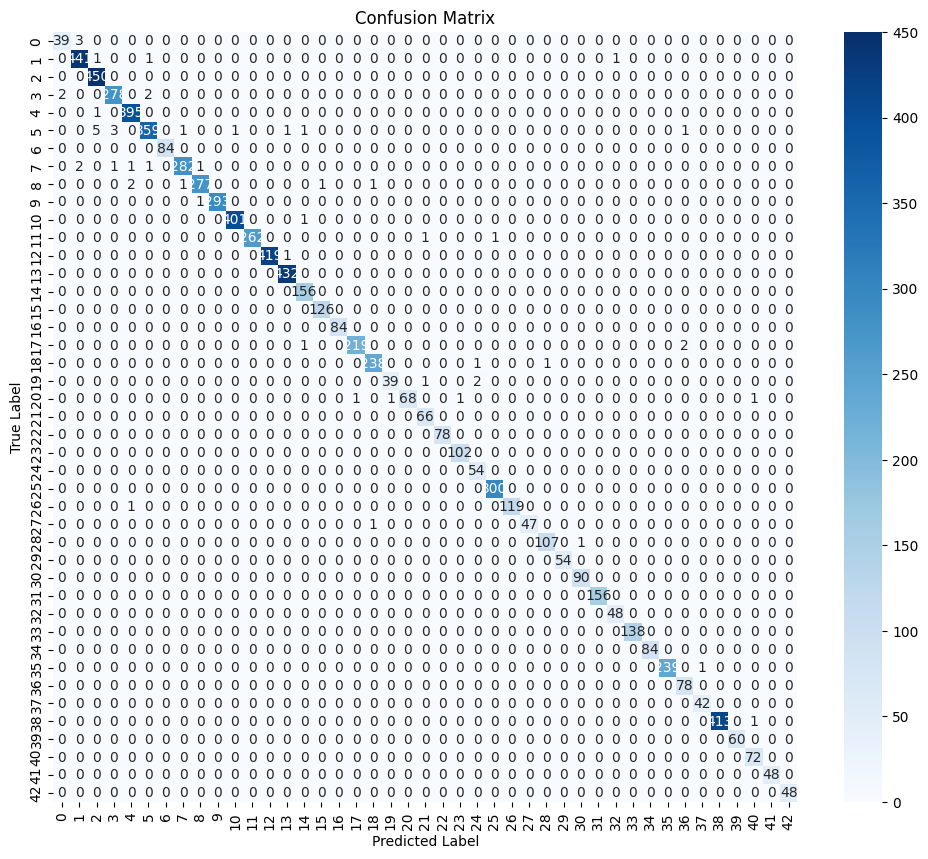

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Prediction and true label (argmax to get class indices)
y_pred_prob = model.predict(X_valid)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_valid_cat, axis=1)

# Confusion matrix compute karo
cm = confusion_matrix(y_true, y_pred)

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
print("validation folder contains:", os.listdir('validation'))
print("train folder contains:", os.listdir('train'))


validation folder contains: ['00001', '00007', '00027', '00020', '00009', '00016', '00028', '00003', '00021', '00022', '00025', '00008', '00024', '00042', '00033', '00026', '00012', '00000', '00019', '00015', '00037', '00005', '00023', '00004', '00029', '00002', '00032', '00035', '00040', '00011', '00018', '00038', '00031', '00013', '00039', '00017', '00010', '00041', '00006', '00034', '00036', '00030', '00014']
train folder contains: ['00001', '00007', '00027', '00020', '00009', '00016', '00028', '00003', '00021', '00022', '00025', '00008', '00024', '00042', '00033', '00026', '00012', '00000', '00019', '00015', '00037', '00005', '00023', '00004', '00029', '00002', '00032', '00035', '00040', '00011', '00018', '00038', '00031', '00013', '00039', '00017', '00010', '00041', '00006', '00034', '00036', '00030', '00014']


In [ ]:
def load_images_and_labels(folder_path, img_size=(32,32)):
    import cv2, os
    import numpy as np
    X = []
    y = []
    for label in sorted(os.listdir(folder_path)):
        class_folder = os.path.join(folder_path, label)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(int(label))
    return np.array(X), np.array(y)

# Example: loader for test data images from validation directory
X_test, y_test = load_images_and_labels('./validation')
print(X_test.shape, y_test.shape)


(7842, 32, 32, 3) (7842,)


In [ ]:
X_test = X_test.astype('float32') / 255.0


In [ ]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')


Test Accuracy: 0.9927


In [ ]:
X_test = X_test.astype('float32') / 255.0

In [ ]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Test Accuracy: 0.035960214231063506


In [ ]:
print("Shape:", X_test[0].shape)
print("Min:", X_test[0].min())
print("Max:", X_test[0].max())
print("Dtype:", X_test[0].dtype)
print("Mean:", X_test[0].mean())


Shape: (32, 32, 3)
Min: 2.12854e-09
Max: 4.8246903e-08
Dtype: float32
Mean: 2.693456e-08


In [ ]:
X_test, y_test = load_images_and_labels('./validation')  # Loader se fresh import
print(X_test[0].min(), X_test[0].max())  # Example: 0 - 255 hona chahiye


9 204


In [ ]:
X_test = X_test.astype('float32') / 255.0
print(X_test[0].min(), X_test[0].max())  # Ab 0.0 - 1.0 ke beech hona chahiye


0.03529412 0.8


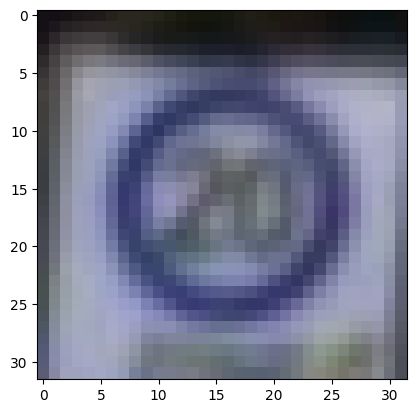

In [ ]:
plt.imshow(X_test[0])
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Test Accuracy: 0.9927
Real Label: 0 | Predicted Label: 0


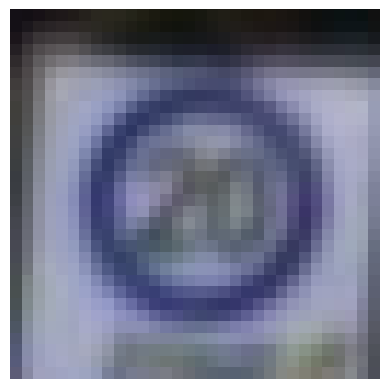

Real Label: 0 | Predicted Label: 0


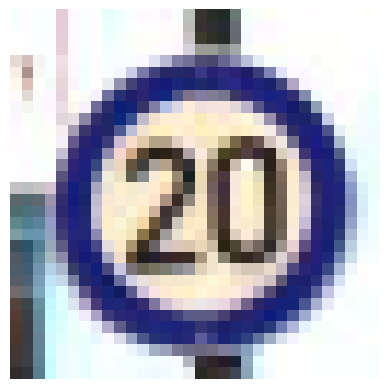

Real Label: 0 | Predicted Label: 0


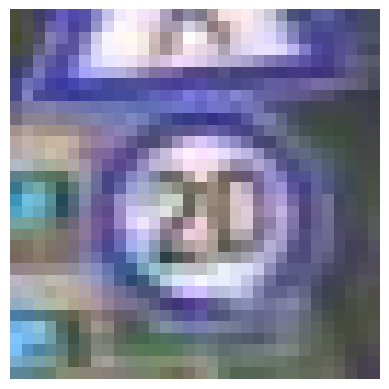

Real Label: 0 | Predicted Label: 0


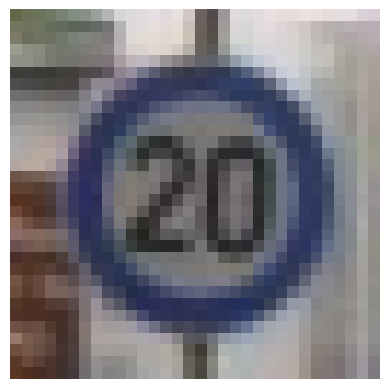

Real Label: 0 | Predicted Label: 0


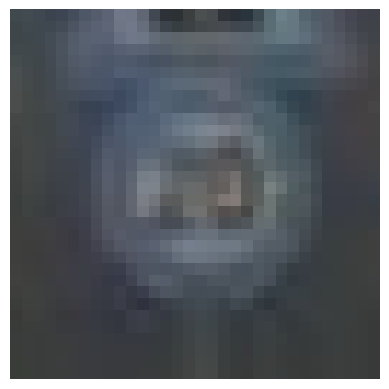

Real Label: 0 | Predicted Label: 1


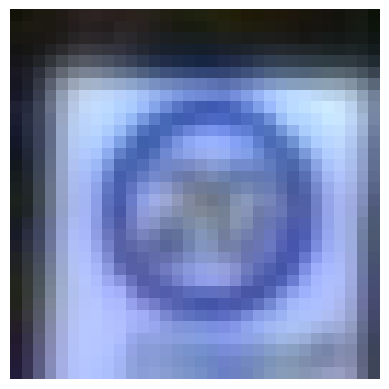

Real Label: 0 | Predicted Label: 0


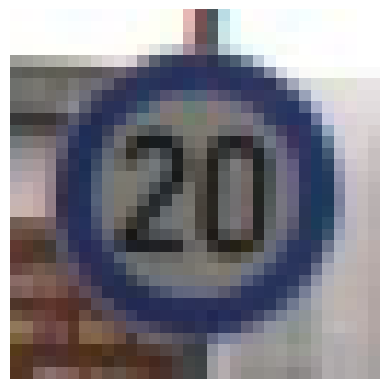

Real Label: 0 | Predicted Label: 0


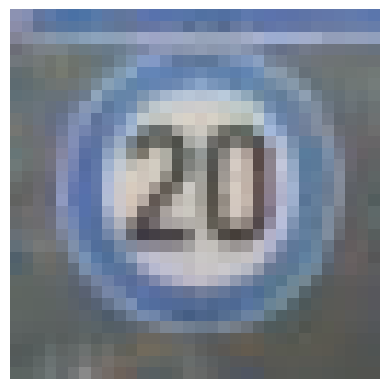

Real Label: 0 | Predicted Label: 0


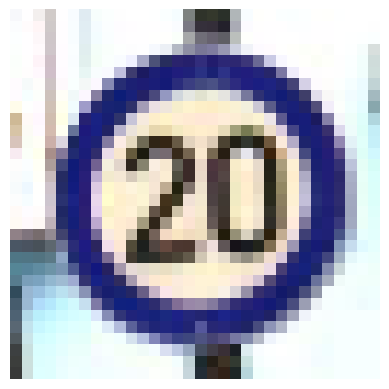

Real Label: 0 | Predicted Label: 0


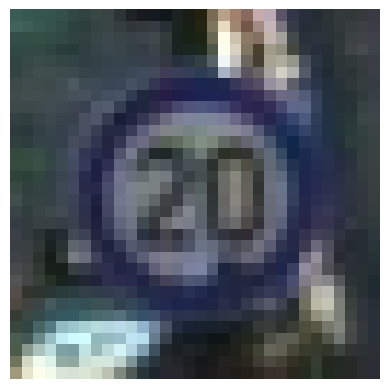

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Test images aur labels ke saath prediction
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy check
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Pehli 10 images visualize karna predicted & actual label ke saath
for i in range(10):
    plt.imshow(X_test[i])
    plt.axis('off')
    print(f"Real Label: {y_test[i]} | Predicted Label: {y_pred[i]}")
    plt.show()


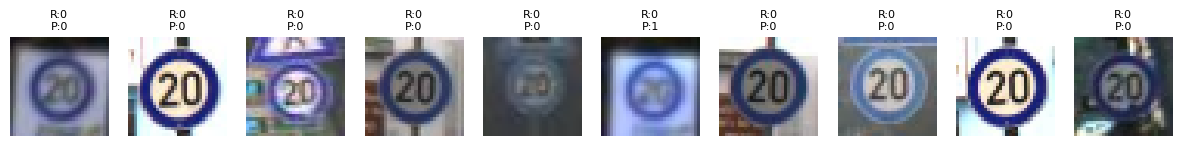

In [ ]:
import matplotlib.pyplot as plt

num_images = 10
plt.figure(figsize=(15, 5))  # Figure size adjust karein apne hisaab se

for i in range(num_images):
    plt.subplot(1, num_images, i+1)  # 1 row, num_images columns
    plt.imshow(X_test[i])
    plt.axis('off')
    real_label = y_test[i]
    predicted_label = y_pred[i]
    plt.title(f"R:{real_label}\nP:{predicted_label}", fontsize=8)

plt.show()
